In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read the CSV and Perform Basic Data Cleaning

In [5]:
# Load the data

housing_df = pd.read_csv('..\Data\clean_merged_data.csv')

In [6]:
housing_df.head()

,City,Longitude,latitude,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,ocean_proximity,max_temp,Humidity,Cloudiness,wind_speed,Description,County,Employees,Establishments
0,Mission Viejo,-117.66,33.61,789,16,8.4112,286900,2022,254,270,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
1,Mission Viejo,-117.66,33.62,1962,16,6.2177,256600,4065,661,636,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
2,Mission Viejo,-117.67,33.61,1972,24,5.7871,227400,3859,661,624,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
3,Mission Viejo,-117.66,33.61,1713,17,6.0471,248400,3464,519,530,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
4,Mission Viejo,-117.66,33.61,860,21,7.1497,274000,1932,266,286,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255


In [7]:
#drop unnecessary/low value columns 'Longitude','latitude','City','County'

housing_df.drop(['City', 'County','Longitude','latitude'],axis=1, inplace=True)


In [8]:
#convert categorical values

housing_df=pd.get_dummies(housing_df)
housing_df.head()

,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,max_temp,Humidity,Cloudiness,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Description_broken clouds,Description_clear sky,Description_few clouds,Description_haze,Description_overcast clouds,Description_scattered clouds,Description_smoke,Description_thunderstorm
0,789,16,8.4112,286900,2022,254,270,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
1,1962,16,6.2177,256600,4065,661,636,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
2,1972,24,5.7871,227400,3859,661,624,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
3,1713,17,6.0471,248400,3464,519,530,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
4,860,21,7.1497,274000,1932,266,286,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0


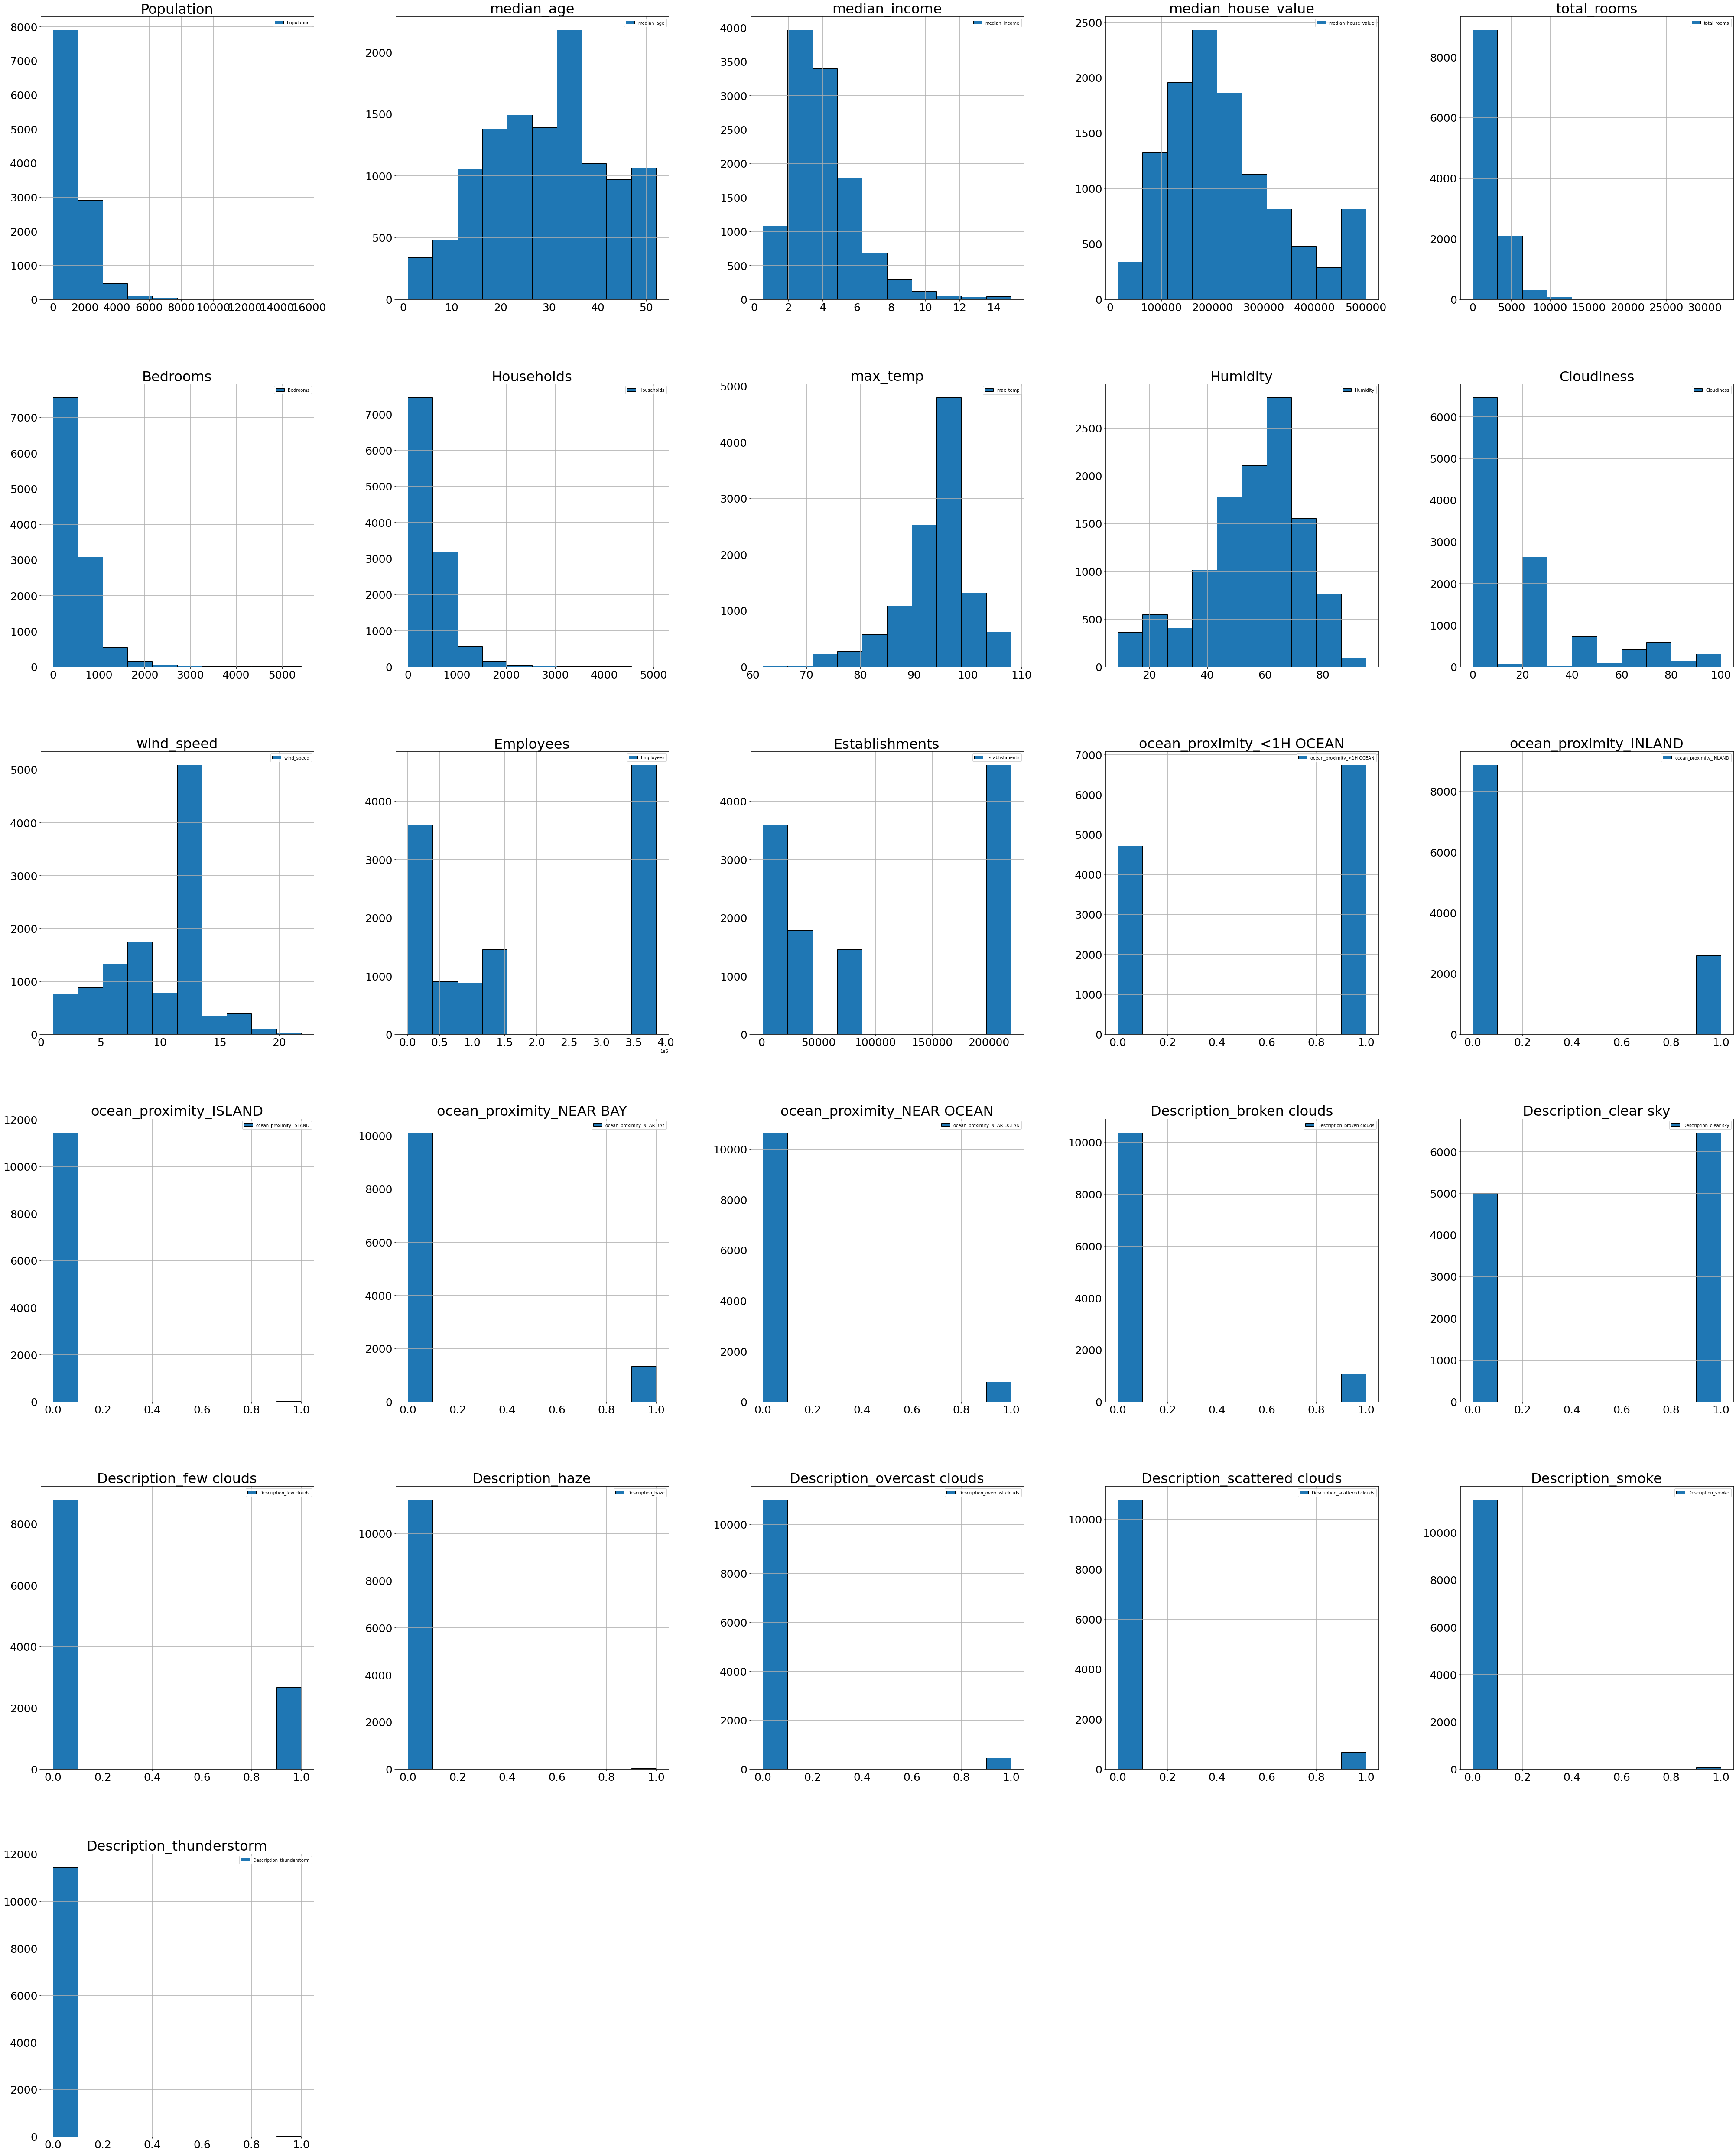

In [9]:
fig = housing_df.hist(figsize = [70,90],grid= True, legend= True,xlabelsize=25,ylabelsize=25,ec='k')
y=[x.title.set_size(32) for x in fig.ravel()]

In [10]:
# Split our preprocessed data into our features and target arrays
X = housing_df.drop(columns = ["median_house_value"])
y = housing_df['median_house_value']


In [11]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/3)

In [12]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Linear Regression

In [13]:
# Define the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# Fit the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
print(model.coef_)
print(model.intercept_)

[-5.69367879e+04  7.85802194e+03  7.04750226e+04  6.11368447e+03
  6.88516828e+03  4.80234909e+04  5.92503369e+03  1.34505638e+04
  1.97150188e+04 -3.15475934e+03  3.16834920e+05 -3.06643388e+05
 -7.52356209e+17 -6.39623928e+17 -2.47361426e+16 -4.84719566e+17
 -3.95203352e+17  3.01199093e+17  5.20520942e+17  4.42966001e+17
  4.95151312e+16  2.08613792e+17  2.50728456e+17  8.12950648e+16
  3.79938159e+16]
225385.53027222757


In [16]:
X.columns 
#'Bedrooms','Households','Employees','ocean_proximity_<1H OCEAN',

coef_df = pd.DataFrame(data= model.coef_,index= X.columns, columns = ['coef_value'])
coef_df

,coef_value
Population,-5.693679e+04
median_age,7.858022e+03
median_income,7.047502e+04
total_rooms,6.113684e+03
Bedrooms,6.885168e+03
Households,4.802349e+04
max_temp,5.925034e+03
Humidity,1.345056e+04
Cloudiness,1.971502e+04
wind_speed,-3.154759e+03


In [17]:
y_pred = model.predict(X_test_scaled)

In [18]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
results

,Actual,Predicted
9412,500001,330847.780272
9331,308900,270935.780272
4120,189800,183135.780272
10851,103600,104095.780272
618,366700,235647.780272
...,...,...
10120,137900,124063.780272
8009,500001,374239.780272
3005,156300,195543.780272
9492,179200,213583.780272


In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 49596.080332173035
Mean Squared Error: 4560634611.67735
Root Mean Squared Error: 67532.47079499868


In [20]:
model.score(X_test_scaled, y_test)

0.6469528337450026

# Random Forest Regressor

In [21]:
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 1,criterion='squared_error',max_features = 'auto',
                                      max_depth = 7)

random_forest.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, random_state=1)

In [22]:
# Calculated actual v. predicted values for y

y_pred = random_forest.predict(X_test_scaled)
print(len(y_pred))
print(len(y_test))

print(f"y_pred ",y_pred)
print(f"y_test ", y_test)


df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


3818
3818
y_pred  [398961.56724012 228462.04722042 182703.48924931 ... 167276.99514246
 226195.14834486 264229.80582515]
y_test  9412     500001
9331     308900
4120     189800
10851    103600
618      366700
          ...  
10120    137900
8009     500001
3005     156300
9492     179200
6454     158900
Name: median_house_value, Length: 3818, dtype: int64


,Actual,Predicted
9412,500001,398961.567240
9331,308900,228462.047220
4120,189800,182703.489249
10851,103600,83863.092953
618,366700,225737.692548
...,...,...
10120,137900,94539.558996
8009,500001,348411.255977
3005,156300,167276.995142
9492,179200,226195.148345


In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43042.8736477768
Mean Squared Error: 3723029129.806957
Root Mean Squared Error: 61016.62994468767


In [24]:
random_forest.score(X_test_scaled, y_test)

0.7117934243629898

# Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
# define the model
model = GradientBoostingRegressor(random_state = 1)
model.fit(X_train_scaled,y_train)


GradientBoostingRegressor(random_state=1)

In [27]:
y_pred = model.predict(X_test_scaled)
y_pred

df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
9412,500001,398961.567240
9331,308900,228462.047220
4120,189800,182703.489249
10851,103600,83863.092953
618,366700,225737.692548
...,...,...
10120,137900,94539.558996
8009,500001,348411.255977
3005,156300,167276.995142
9492,179200,226195.148345


In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Mean Absolute Error: 40199.80440804308
Mean Squared Error: 3229866156.186027
Root Mean Squared Error: 56831.911424709506


In [29]:
model.score(X_test_scaled, y_test)

0.7499700829124283